<a href="https://colab.research.google.com/github/abinaya-p/DataScience/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Input, Flatten, Concatenate
from keras.models import Model




In [35]:
# Load the dataset from the CSV file
data = pd.read_csv('/content/drive/MyDrive/dataset/Breast_cancer_data.csv')
data



,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [36]:
# EDA: Display basic information about the dataset
print("Dataset Information:")
print(data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
None


In [37]:
# EDA: Display summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())




Summary Statistics:
       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000  


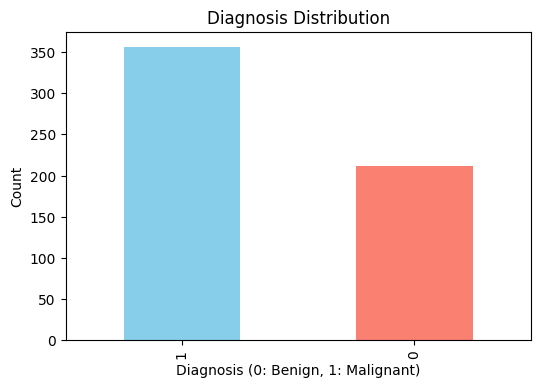

In [38]:
# EDA: Visualize the distribution of diagnosis labels
plt.figure(figsize=(6, 4))
data['diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title ('Diagnosis Distribution')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()


In [40]:

# Split the data into the input features (X) and the labels (y)
X_tabular = data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']].values
X_images = data['diagnosis'].values
y = data['diagnosis'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [41]:

# Split the dataset into a training set and a test set
X_tabular_train, X_tabular_test, X_images_train, X_images_test, y_train, y_test = train_test_split(X_tabular, X_images, y, test_size=0.2, random_state=42)


In [43]:

# Define the DNN model for tabular data
input_tabular = Input(shape=(5,))
x = Dense(10, activation='relu')(input_tabular)
output_tabular = Dense(1, activation='sigmoid')(x)
x

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_45')>

In [45]:

# Define the CNN model for image data
input_images = Input(shape=(1,1))  # You may need to adjust the input shape depending on your image data
x = Flatten()(input_images)
# Add CNN layers as needed
output_images = Dense(1, activation='sigmoid')(x)
output_images

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_48')>

In [46]:

# Combine the models using Concatenate
combined = Concatenate()([output_tabular, output_images])
combined


<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'concatenate_17')>

In [47]:
# Define the final output layer and compile the model
output = Dense(1, activation='sigmoid')(combined)
model = Model(inputs=[input_tabular, input_images], outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



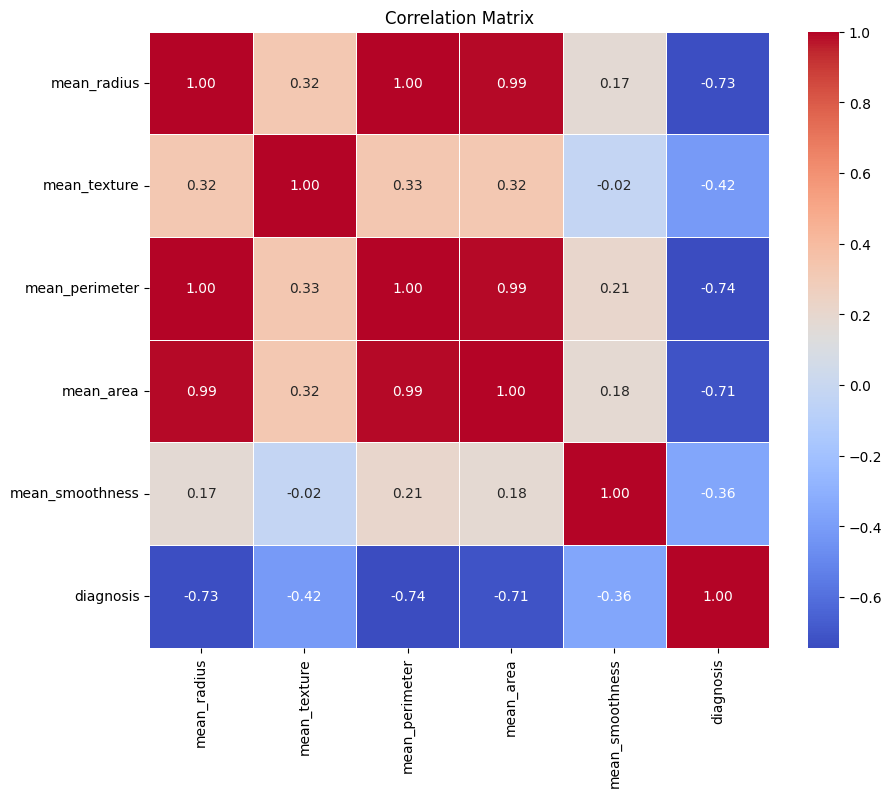

In [48]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [49]:
# Fit the model to the training data
model.fit([X_tabular_train, X_images_train], y_train, epochs=10, batch_size=32)


Epoch 1/10
15/15 [==============================] - 1s 2ms/step - loss: 0.6633 - accuracy: 0.6286
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6286
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6286
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.6286
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6286
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6286
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6286
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6286
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6286
Epoch 10/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6286


In [50]:

# Evaluate the model on the test data
loss, accuracy = model.evaluate([X_tabular_test, X_images_test], y_test)
print('\nTest loss:', loss)
print('Test accuracy:', accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.6228

Test loss: 0.6450697779655457
Test accuracy: 0.6228070259094238
